In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline

In [13]:
facilities = pd.read_csv("D:\\Datasets\\health-facilities-gh.csv")
tiers = pd.read_csv("D:\\Datasets\\health-facility-tiers.csv")

In [11]:
#The facilities have some missing Town Values.
print("Facilities: {}\n".format(facilities.info()))
print("Facilities and tiers: {}".format(tiers.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        3756 non-null   object 
 1   District      3756 non-null   object 
 2   FacilityName  3756 non-null   object 
 3   Type          3756 non-null   object 
 4   Town          3603 non-null   object 
 5   Ownership     3756 non-null   object 
 6   Latitude      3732 non-null   float64
 7   Longitude     3732 non-null   float64
dtypes: float64(2), object(6)
memory usage: 234.9+ KB
Facilities: None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    1475 non-null   object
 1   Facility  1475 non-null   object
 2   Tier      1475 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.7+ KB
Facilities and tiers: None


In [12]:
#Facility names are labeled differently.
#The case of the two columns is different so for combining, align them in the same case.
print(facilities.head())
print('-' * 70)
print(tiers.head())

    Region          District             FacilityName           Type  \
0  Ashanti     Offinso North        A.M.E Zion Clinic         Clinic   
1  Ashanti  Bekwai Municipal        Abenkyiman Clinic         Clinic   
2  Ashanti      Adansi North     Aboabo Health Centre  Health Centre   
3  Ashanti     Afigya-Kwabre  Aboabogya Health Centre  Health Centre   
4  Ashanti            Kwabre     Aboaso Health Centre  Health Centre   

           Town   Ownership  Latitude  Longitude  
0      Afrancho        CHAG   7.40801   -1.96317  
1  Anwiankwanta     Private   6.46312   -1.58592  
2   Aboabo No 2  Government   6.22393   -1.34982  
3     Aboabogya  Government   6.84177   -1.61098  
4        Aboaso  Government   6.84177   -1.61098  
----------------------------------------------------------------------
    Region                   Facility  Tier
0  Ashanti    PEACE AND LOVE HOSPITAL     2
1  Ashanti             TODAH HOSPITAL     2
2  Ashanti  ASOKWA CHILREN'S HOSPITAL     2
3  Ashanti    

In [14]:
#Common facility type in each District
pd.DataFrame(facilities.groupby(['District', 'Type']).size().unstack().idxmax(axis =1))

,0
District,
Abura-Asebu-Kwamankese,CHPS
Accra Metropolitan,Clinic
Adaklu-Anyigbe,Health Centre
Adansi North,Health Centre
Adansi South,Health Centre
...,...
West Gonja,CHPS
West Mamprusi,Health Centre
Yendi,Health Centre


In [15]:
#Common facility type in each town
pd.DataFrame(facilities.groupby(['Town', 'Type']).size().unstack().idxmax(axis =1))

,0
Town,
.Sampa,District Hospital
1000 Acre,CHPS
37,Psychiatric Hospital
37 Licencing Office,Clinic
5th Bank Lane (Near Bank of Ghana),Clinic
...,...
Zuarungu,Health Centre
Zuarungu-Moshie,Clinic
Zubeogo,Health Centre


In [16]:
#Common health facility type in each region
pd.DataFrame(facilities.groupby(['Region', 'Type']).size().unstack().idxmax(axis =1))

,0
Region,
Ashanti,Clinic
Brong Ahafo,Clinic
Central,CHPS
Eastern,RCH
Greater Accra,Clinic
Northern,Health Centre
Upper East,CHPS
Upper West,CHPS
Volta,Health Centre


Text(0.5, 1.0, 'Count of each health facility type')

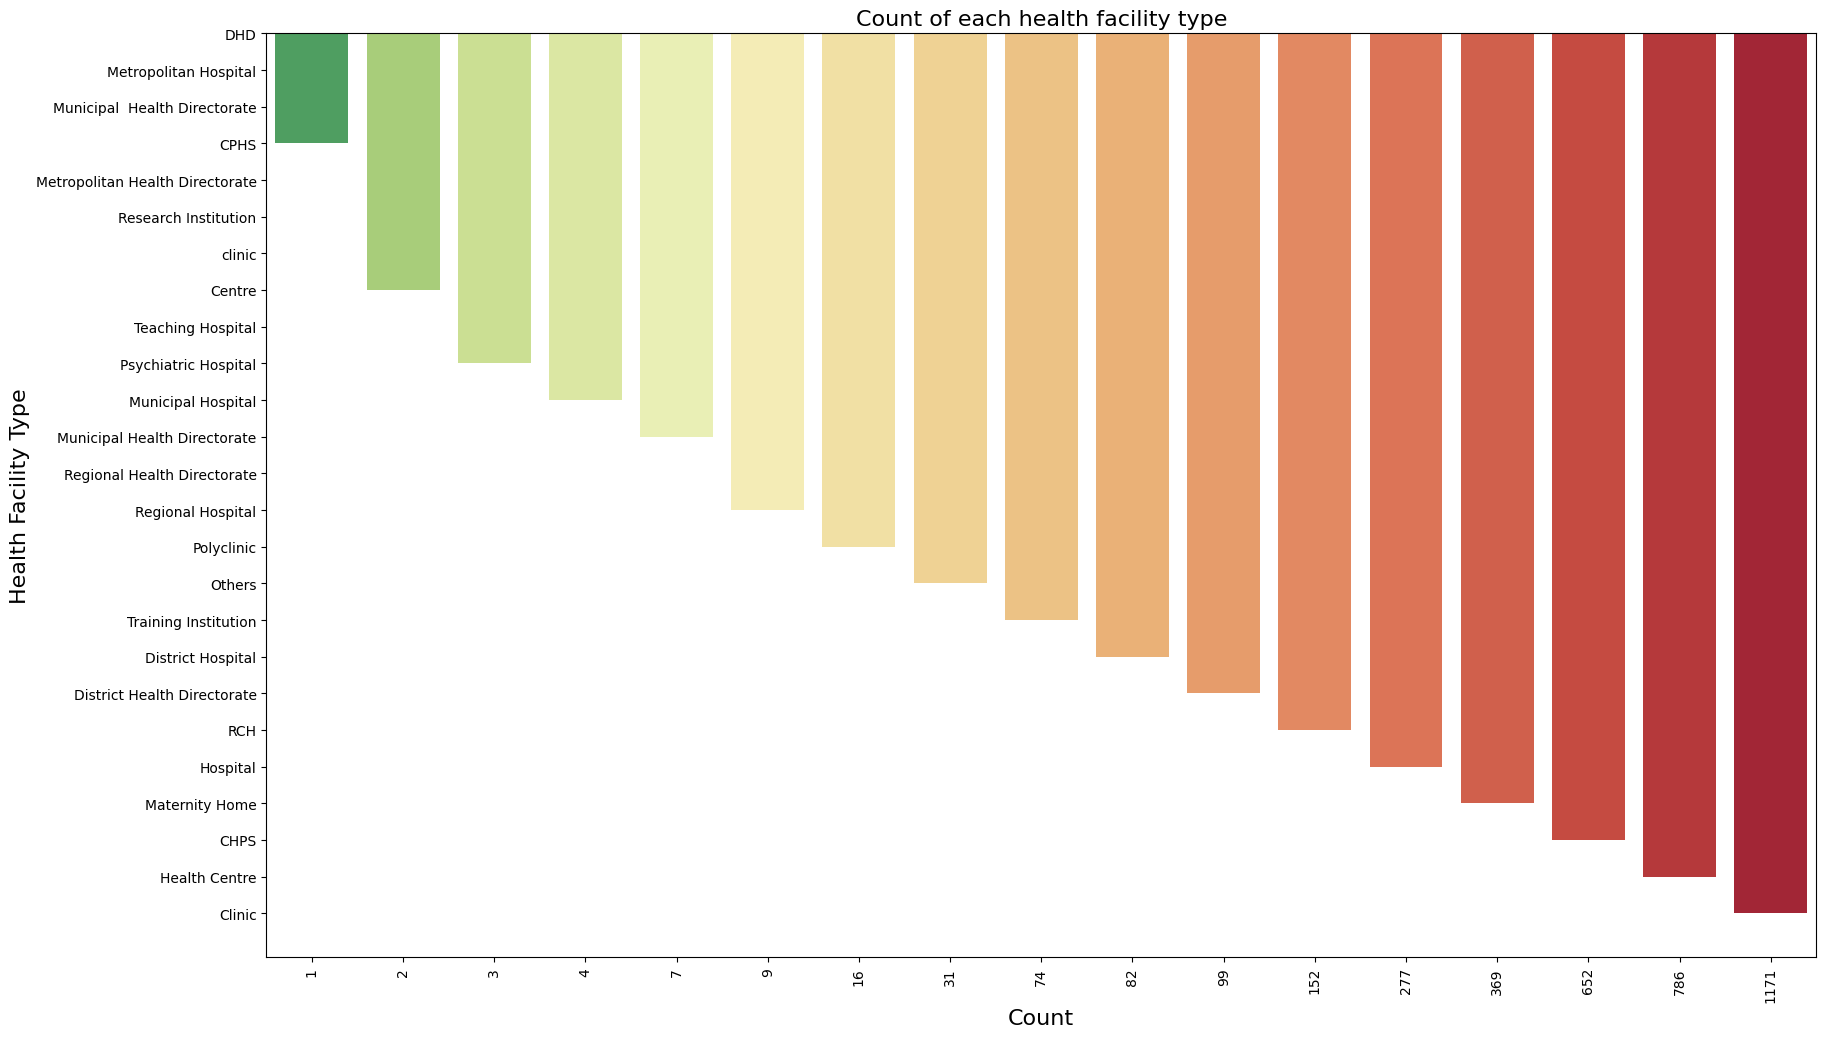

In [25]:
##All facility types across Ghana country.
facility_types = facilities['Type'].value_counts()
n_colors = len(facility_types)
colors = sns.color_palette("RdYlGn_r", n_colors)
plt.figure(figsize = (20, 12))
bars = sns.barplot(x=facility_types.values, y=facility_types.index, hue=facility_types.index, palette=colors, orient='v', dodge=False, legend=False)
plt.xticks(rotation = 90)
plt.xlabel("Count", fontsize=16)
plt.ylabel("Health Facility Type", fontsize=16)
plt.title("Count of each health facility type", fontsize = 16)

Text(0.5, 1.0, 'Exploded Pie Chart: Ownership distribution of health facilities')

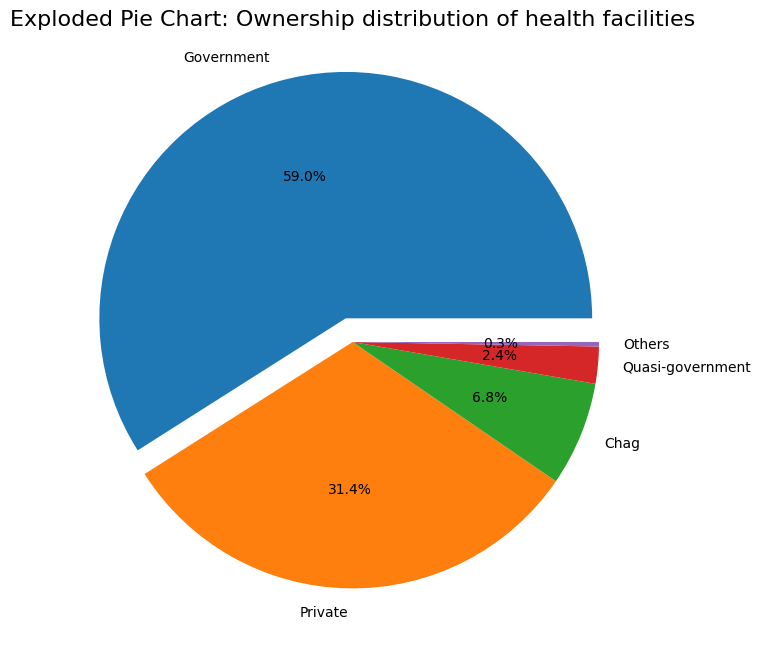

In [40]:
##Ownership counts
ownership_counts = facilities['Ownership'].str.capitalize().value_counts()
others = ownership_counts[4:].sum()
ownership_counts = ownership_counts[:4]
ownership_counts['Others'] = others
explode = [0.1 if i == 0 else 0 for i in range(len(ownership_counts))]
plt.figure(figsize=(12, 8))
plt.pie(ownership_counts.values, labels=ownership_counts.index, explode=explode, autopct='%1.1f%%')
plt.title("Exploded Pie Chart: Ownership distribution of health facilities", fontsize=16)

In [15]:
#Map health facilities across Ghana
max_long = facilities['Longitude'].max()
min_long = facilities['Longitude'].min()
max_lat = facilities['Latitude'].max()
min_lat = facilities['Latitude'].min()

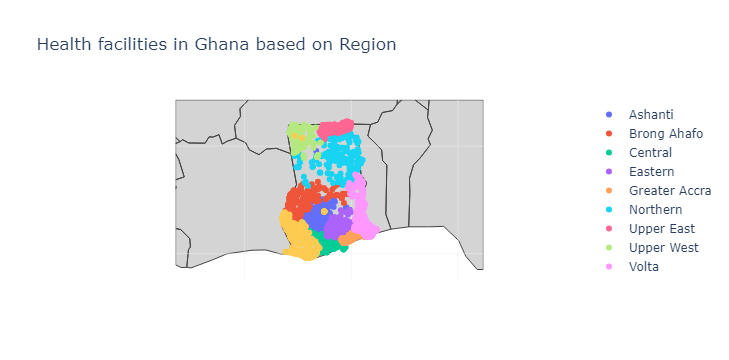

In [22]:
data = []
for index, region in enumerate(facilities['Region'].unique()):
    selected_facilities = facilities[facilities['Region'] == region]
    data.append(
        go.Scattergeo(
            lon=selected_facilities['Longitude'],
            lat=selected_facilities['Latitude'],
            text=selected_facilities['FacilityName'],
            mode='markers',
            marker=dict(color=index),
            name=region
        )
    )

layout = dict(
    title='Health facilities in Ghana based on Region',
    geo=dict(
        scope='africa',
        showland=True,
        landcolor="rgb(212, 212, 212)",
        subunitcolor="rgb(206, 212, 218)",  
        lonaxis=dict(
            showgrid=True,
            gridwidth=0.5,
            range=[min_long - 5, max_long + 5],
            dtick=5
        ),
        lataxis=dict(
            showgrid=True,
            gridwidth=0.5,
            range=[min_lat - 1, max_lat + 1],
            dtick=5
        )
    ),
    mapbox=dict(
        style='carto-positron'  
    )
)

fig = go.Figure(data=data, layout=layout)
fig.show()

In [23]:
#Plot tiers for each facility
facilities['FacilityName'] = facilities['FacilityName'].str.lower()
tiers['Facility'] = tiers['Facility'].str.lower()
combined = pd.merge(facilities, tiers, left_on=['FacilityName'], right_on=['Facility'])

In [29]:
# Missing values in the latitude and longitude columns
missing_longitude = facilities['Longitude'].isnull().sum()
missing_latitude = facilities['Latitude'].isnull().sum()

print("Number of missing longitude values:", missing_longitude)
print("Number of missing latitude values:", missing_latitude)


Number of missing longitude values: 24
Number of missing latitude values: 24


In [32]:
# Mean
facilities['Longitude'] = facilities['Longitude'].fillna(facilities['Longitude'].mean())
facilities['Latitude'] = facilities['Latitude'].fillna(facilities['Latitude'].mean())

# Recalculate the center coordinates of Ghana
ghana_center_lon = facilities['Longitude'].mean()
ghana_center_lat = facilities['Latitude'].mean()

print("Ghana Center Longitude:", ghana_center_lon)
print("Ghana Center Latitude:", ghana_center_lat)


Ghana Center Longitude: -1.0745798865211682
Ghana Center Latitude: 6.955677782875134


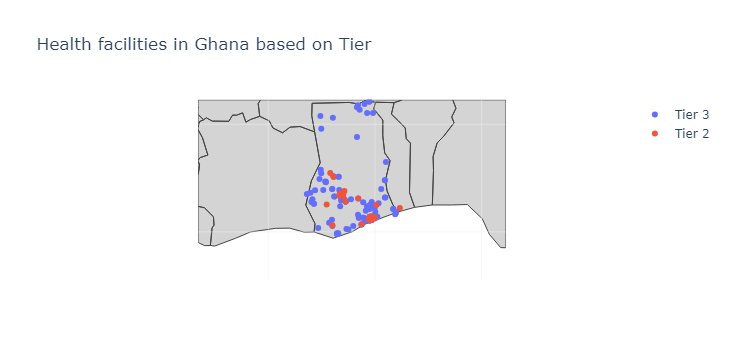

In [34]:
data = []
for index, tier in enumerate(combined['Tier'].unique()):
    selected_facilities = combined[combined['Tier'] == tier]
    data.append(
        go.Scattergeo(
        lon = selected_facilities['Longitude'],
        lat = selected_facilities['Latitude'],
        text = selected_facilities['FacilityName'],
        mode = 'markers',
        marker_color = index,
        name = "Tier " + str(tier)
        )
    )

layout = dict(
        title = 'Health facilities in Ghana based on Tier',
        geo = dict(
        scope = 'africa',
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(206, 212, 218)",
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ min_long - 5, max_long + 5 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ min_lat - 1, max_lat + 1 ],
            dtick = 5
        ), 
        center=dict(lon= -1.0745798865211682, lat=  6.955677782875134),  
        projection_type='mercator',  
    )
)
fig = dict(data = data, layout = layout)
go.Figure(fig)
